<a href="https://colab.research.google.com/github/TechSlinger/TechSlinger.github.io/blob/main/clustering_hi%C3%A9rarchique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(200, 5)
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Index(['Spending Score (1-100)', 'Genre_Female'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Labeled Customer Data Reduced with PCA')

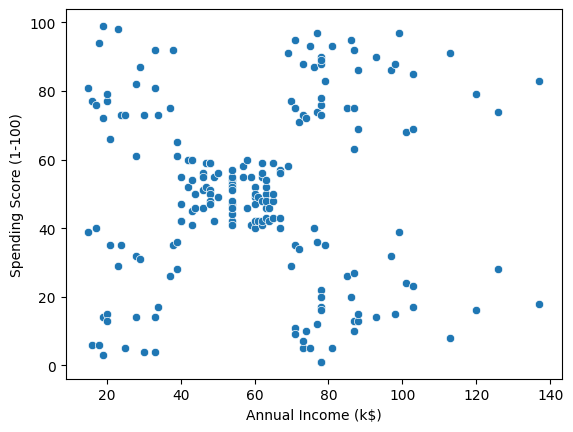

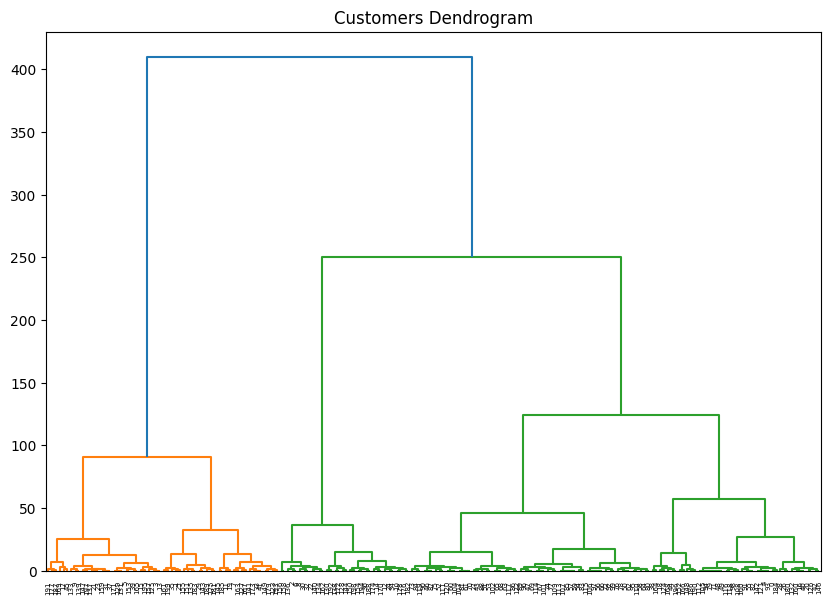

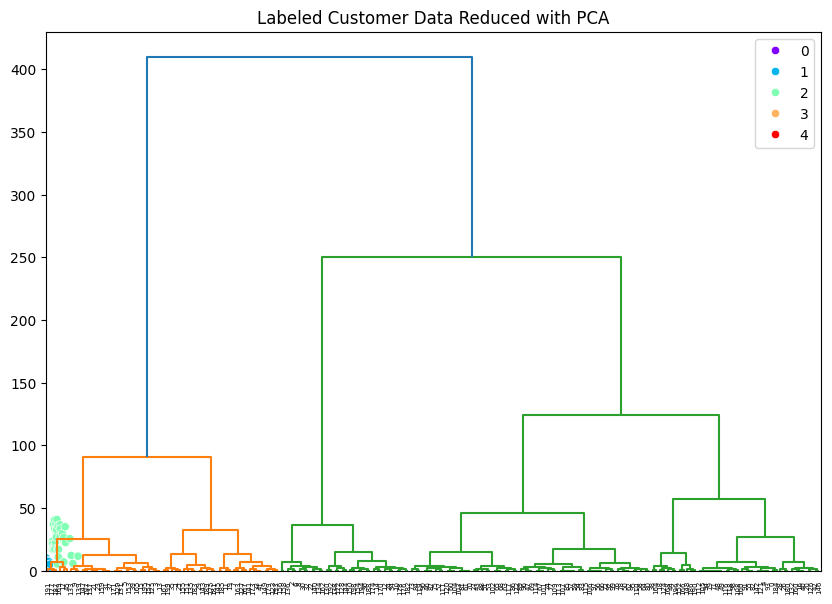

In [22]:
import pandas as pd
path_to_file ='/content/data-shopping.csv'
customer_data=pd.read_csv(path_to_file)
print(customer_data.shape)
print(customer_data.columns)
#customer_data['Spending Score (1-100)'].hist()
customer_data.describe().transpose()
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)
# To be able to look at the result stored in the variable
customer_data['Age Groups']
customer_data.groupby('Age Groups')['Age Groups'].count()
# The _oh means one-hot
customer_data_oh = pd.get_dummies(customer_data)
import seaborn as sns
# Dropping CustomerID column from data
customer_data_oh = customer_data_oh.drop('CustomerID', axis=1)
#sns.pairplot(customer_data_oh)
sns.scatterplot(x=customer_data['Annual Income (k$)'],
y=customer_data['Spending Score (1-100)'])
customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
customer_data_oh.shape # (200, 10)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit_transform(customer_data_oh)
pca.explained_variance_ratio_.cumsum()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(customer_data_oh)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
#sns.scatterplot(x=pc1_values, y=pc2_values)
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
method='ward',
metric="euclidean")
shc.dendrogram(Z=clusters)
#plt.show()
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
method='ward',
metric="euclidean")
shc.dendrogram(clusters)
#plt.axhline(y = 125, color = 'r', linestyle = '-')
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_
print(selected_data.columns)
data_labels = clustering_model.labels_
'''sns.scatterplot(x=customer_data['Annual Income (k$)'],
y=customer_data['Spending Score (1-100)'],
data=selected_data,
hue=data_labels,
palette="rainbow").set_title('Labeled Customer Data')'''
clustering_model_pca = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
linkage='ward')
clustering_model_pca.fit(pcs)
data_labels_pca = clustering_model_pca.labels_
sns.scatterplot(x=pc1_values,
y=pc2_values,
hue=data_labels_pca,
palette="rainbow").set_title('Labeled Customer Data Reduced with PCA')